##Predicting Student Admissions with Neural Networks in Keras

In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:

* GRE Scores (Test)
* GPA Scores (Grades)
* Class rank (1-4)
The dataset originally came from here: http://www.ats.ucla.edu/



In [71]:
!pip install seaborn==0.9.0

    100% |████████████████████████████████| 215kB 4.7MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1
  [seaborn]
You must restart the runtime in order to use newly installed versions.


In [0]:
data_path='student_data.csv'

In [0]:
# Imports
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv(data_path)

In [3]:
# Printing out the first 5 rows of our data
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


Above we can see that the first column is the label y(admit column), which corresponds to acceptance/rejection. Namely, a label of 1 means the student got accepted, and a label of 0 means the student got rejected.

In [0]:
admitted=data[data['admit']==1]
rejected=data[data['admit']==0]

##Plotting the data

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

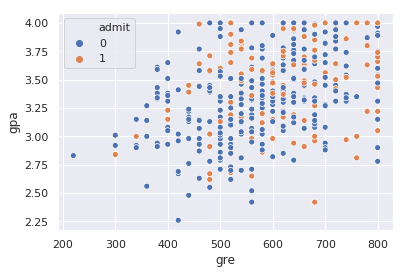

In [13]:
sns.scatterplot(x='gre',y='gpa',hue='admit',data=data)

When we plot the data, we get the following graphs, which show that unfortunately, the data is not as nicely separable as we'd hope
Maybe it would help to take the rank into account? Let's make 4 plots, each one for each rank.

In [0]:
# Separating the ranks
rank1 = data[data["rank"]==1]
rank2 = data[data["rank"]==2]
rank3 = data[data["rank"]==3]
rank4 = data[data["rank"]==4]

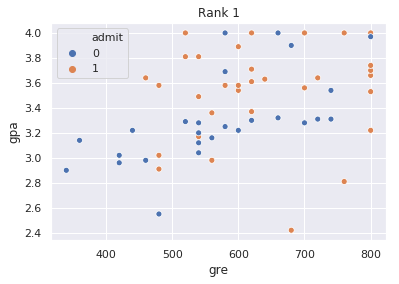

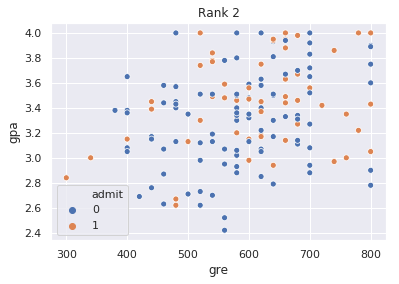

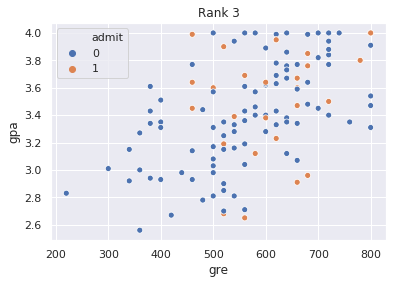

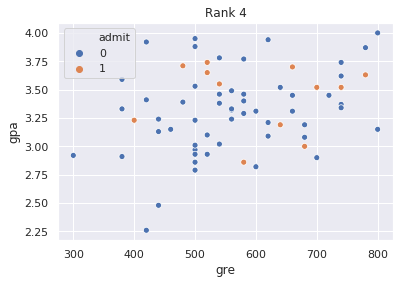

In [17]:
# Plotting the graphs
sns.scatterplot(x='gre',y='gpa',hue='admit',data=rank1)
plt.title("Rank 1")
plt.show()
sns.scatterplot(x='gre',y='gpa',hue='admit',data=rank2)
plt.title("Rank 2")
plt.show()
sns.scatterplot(x='gre',y='gpa',hue='admit',data=rank3)
plt.title("Rank 3")
plt.show()
sns.scatterplot(x='gre',y='gpa',hue='admit',data=rank4)
plt.title("Rank 4")
plt.show()

This looks more better, as it seems that the lower the rank, the higher the acceptance rate. Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.

##One-hot encoding the rank

In [18]:
# Make dummy variables for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

# Print the first 10 rows of our data
one_hot_data.head(10)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


##Data Scaling

Notice that the range for grades is 1.0 - 4.0, whereas the range for test scores is roughly 200 - 800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0 - 1, by dividing the grades by 4.0, and the test score by 800.

In [19]:
# Copying our data
processed_data = one_hot_data
# Scaling the columns
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1


##Splitting the data into Training and Testing

In [20]:
processed_data.shape

(400, 7)

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(processed_data.drop(['admit'],axis=1),processed_data['admit'],test_size=0.1)

In [32]:
import keras

Using TensorFlow backend.


In [0]:
x_train=np.array(X_train)
x_test=np.array(X_test)
y_train=keras.utils.to_categorical(np.array(y_train))
y_test=keras.utils.to_categorical(np.array(y_test))

##Defining the model architecture


In [0]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

In [53]:
# Building the model
model = Sequential()
model.add(Dense(128, input_dim=6))
model.add(Activation('sigmoid'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('sigmoid'))
 
# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               896       
_________________________________________________________________
activation_7 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
_________________________________________________________________
activation_8 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
_________________________________________________________________
activation_9 (Activation)    (None, 2)                 0         
Total params: 5,090
Trainable params: 5,090
Non-trainable params: 0
_________________________________________________________________


##Training and Evaluation of the model

In [54]:
# Training the model
model.fit(x_train, y_train, epochs=1000, batch_size=100, verbose=0)

In [55]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(x_test, y_test)
print("\n Testing Accuracy:", score[1])


360/360 [==============================] - 0s 257us/step

 Training Accuracy: 0.7083333333333334
40/40 [==============================] - 0s 79us/step

 Testing Accuracy: 0.75


Parameters can be tuned to improve accuracy